In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

### Frank-Wolfe (conditional gradient method)

**Problem:**
$$
\min\limits_{x\in X}f(x)
$$

**Method:** Choosing a direction $s_{t}\in\arg\min\limits_{x\in X}\nabla f(x_t)^T x$ (linear oracle) and taking a step $x_{t+1}=(1-\gamma_t)x_t+\gamma_ts_t$ for $\gamma_t=2/(t+1)$

**Motivation:** solving linear oracle might be simpler than doing a projection step.

In this notebook I take a small simple problem and apply vanilla Frank-Wolfe for it.

Define the set $X = \{x\in\mathbb{R}^n\big| \|x\|_p\leq R\}$ and $f(x)=-\frac{1}{2}x^TAx+b^T x$ for symmetrical $A\succeq 0$.

Then for any $x$, $\nabla f(x)=-Ax+b$. Now we need to compute $\min\limits_{\|s\|_p\leq R}g^T s$ which gives $s(g)=-R|g|^{q/p}\mbox{sign} g/\|g\|_q^{q/p}$ for $q$ s.t. $1/p+1/q=1$

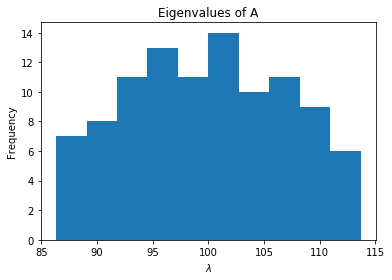

In [2]:
# dimensionality
n = 100

# set radius
R = 1

# norm order
p = 3.1
q = 1. / (1 - 1. / p)

# random matrix
A = np.random.randn(n, n)

# making it symmetrical
A = (A + A.T) / 2

# and p.s.d.
A = A + np.eye(n) * n / 1

# some b
b = np.random.randn(n, 1)

# sanity check
assert np.min(np.linalg.eig(A)[0]) > 0, "Must have p.s.d. A"

# plotting eigenvalues
plt.title('Eigenvalues of A')
plt.ylabel('Frequency')
plt.xlabel('$\lambda$')
plt.hist(np.linalg.eig(A)[0])
plt.show()

In [3]:
def f(x):
    """ Function at point x """
    # making a column vector
    x = x.reshape(-1, 1)
    return np.mean(-0.5 * x.T @ A @ x + b.T @ x) # taking the only value

def grad_f(x):
    """ Gradient of f at x """
    
    # making a column vector
    x = x.reshape(-1, 1)
    return -A @ x + b.T @ x

def constraint_slack(x):
    """ Slack at point x """
    x = x.reshape(-1)
    return R - np.linalg.norm(x, ord = p)

In [4]:
def s(g):
    """ Linear oracle """
    g = g.reshape(-1)
    g_qp = np.abs(g) ** (q / p)
    g_qp_signed = np.multiply(g_qp, np.sign(g))
    g_q_qp_norm = np.linalg.norm(g, ord = q) ** (q / p)

    return -R * g_qp_signed / g_q_qp_norm

In [5]:
# another sanity check
assert np.allclose(np.linalg.norm(s(np.random.randn(n)), ord = p), R), "Check s(g) implementation"

In [6]:
# initial point
x = np.random.randn(n, 1)
x = x / np.linalg.norm(x.reshape(-1), ord = p) / 2

# loss values
losses = []

# constraint slacks
slacks = []

# gradient norms
gradnorms = []

# step size
gamma = 0.5

# iterations
for t in range(100):    
    # calculating loss
    losses += [f(x)]
    slacks += [constraint_slack(x)]
    
    # current step
    gamma_t = 2. * gamma / (t + 2)
    
    # gradient at current point
    g = grad_f(x)
    
    gradnorms += [np.linalg.norm(g.reshape(-1), ord = p)]
    
    # linear oracle -> direction
    s_t = s(g).reshape(-1, 1)
    
    # moving a bit in the direction
    x = (1 - gamma_t) * x + gamma_t * s_t

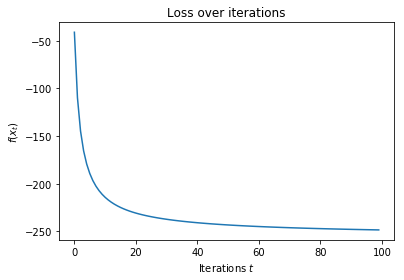

In [7]:
plt.title('Loss over iterations')
plt.xlabel('Iterations $t$')
plt.ylabel('$f(x_t)$')
plt.plot(losses)
plt.show()

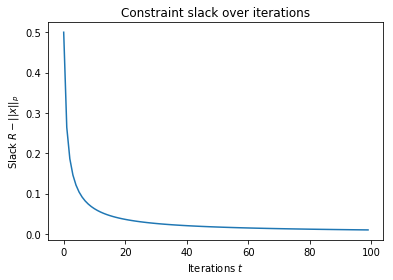

In [8]:
plt.title('Constraint slack over iterations')
plt.xlabel('Iterations $t$')
plt.ylabel('Slack $R-||x||_p$')
plt.plot(slacks)
plt.show()

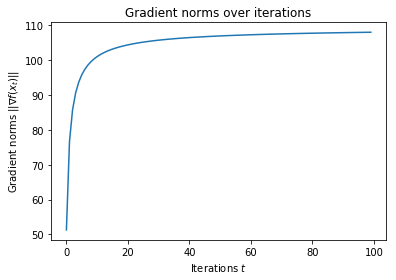

In [9]:
plt.title('Gradient norms over iterations')
plt.xlabel('Iterations $t$')
plt.ylabel('Gradient norms $||\\nabla f(x_t)||$')
plt.plot(gradnorms)
plt.show()